Importing all my necessary libraries for the initial analysis and cleaning of my data.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
%matplotlib inline

In [67]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [68]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

Cabin column has a significant number of null data. It is also non-numeric data, so it can not be imputed with the average value in the column, for example. So, I'm choosing to drop the column.

In [69]:
cabin_col = ["Cabin"]
reduced_train_df = train_df.drop(cabin_col, axis=1)
reduced_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [70]:
reduced_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


I observed that Pedro used a correlation matrix in his analysis. I'd like to observe if there are any near linear relationships between any features. 

<Axes: >

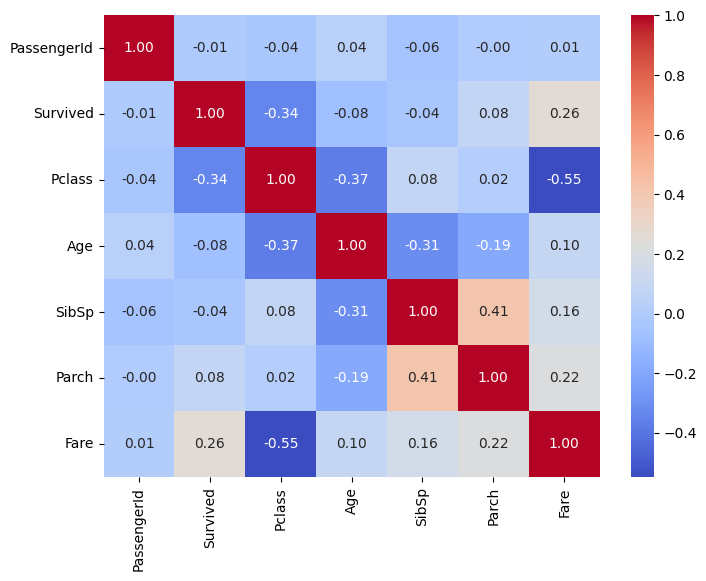

In [71]:
correlation_matrix = reduced_train_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

Just out of curiosity I want to plot 'Fare' vs 'Survived' and 'Pclass' vs 'Survived' as they have the highest correlation to survived. My first instinct was to do a traditional scatter plot with 'Fare' on the x-axis and 'Survived' on the y-axis but as Survived in a binary variable, the graph will not be very informative. Let's code it up just to see.

In [72]:
fig = px.scatter(reduced_train_df,
                 x='Fare',
                 y='Survived',
                 title = 'Fare vs. Survived')
fig.update_traces(marker_size=5)
fig.show()
fig = px.scatter(reduced_train_df,
                 x='Fare',
                 y='Survived',
                 color='Pclass',
                 title = 'Fare vs. Survived')
fig.update_traces(marker_size=5)
fig.show()

Color or no color, graph just isn't very descriptive. This could have to do with the axes. Maybe we could magnify a little bit by changing the maximum to 300 but in those who survived we have an outlier far above 300. So let's try a couple different graphs instead this traditional.

#Jittered Scatter Plot
Similar to a scatter plot but with random noise to avoid overlap.

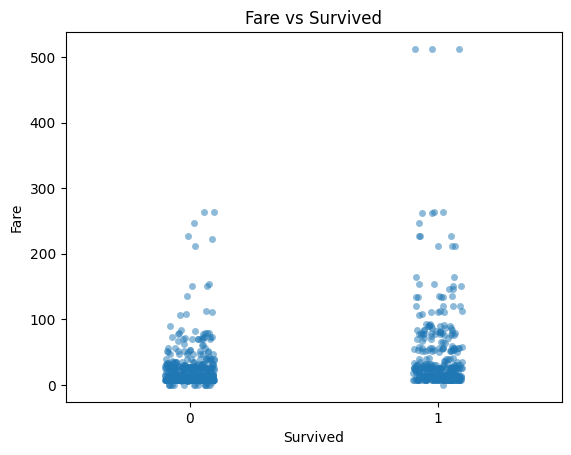

In [73]:
sns.stripplot(x='Survived', y='Fare', data=reduced_train_df, jitter=True, alpha=0.5)
plt.title('Fare vs Survived')
plt.show()

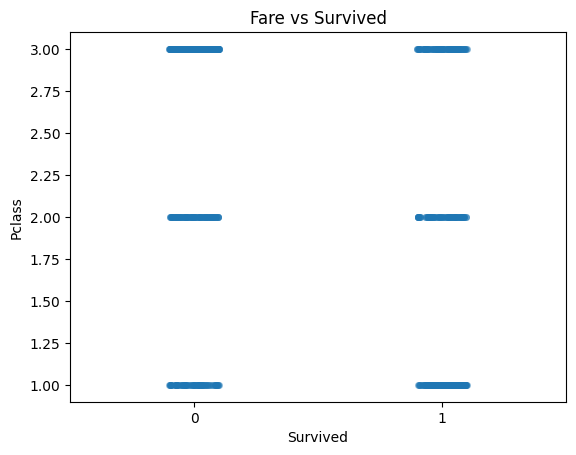

In [74]:
sns.stripplot(x='Survived', y='Pclass', data=reduced_train_df, jitter=True, alpha=0.5)
plt.title('Fare vs Survived')
plt.show()

#Violin Plot
Shows a distribution of a numerical variable across the two classes of Survived

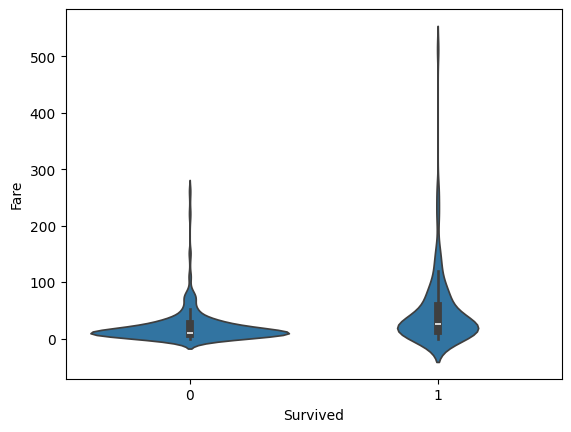

In [75]:
#sns.boxplot(x='Survived', y='Fare', data=reduced_train_df)
sns.violinplot(x='Survived', y='Fare', data=reduced_train_df)
#plt.title('Fare vs Survived')
plt.show()

In [79]:
reduced_train_df.info()
reduced_train_df['Fare'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

Logistic Regression

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

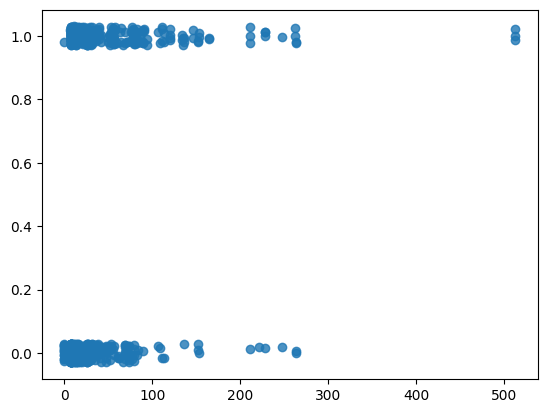

In [ ]:
sns.regplot(x='Fare', y='Survived', data=reduced_train_df, logistic=True, y_jitter=0.03)
plt.show()

I'm going to try a support vector machine just to get a sense of this model and if it can work for a problem like this.

In [ ]:
from sklearn.svm import SVC

X = reduced_train_df.drop(columns = ['Survived'])
y = reduced_train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Partner, Mr. Austen'